

# 🧠 Human-in-the-Loop (HITL) – Simple Example

## 📘 What HITL Means

Human-in-the-Loop (HITL) is when AI does some work, but a human reviews, edits, or approves it before it's finalized. This is useful for tasks where mistakes are costly, like emails, reports, or decisions.

## 🎯 HITL Goals

| Purpose | Description |
|---------|-------------|
| 🖊 **Draft Generation** | AI creates an initial draft or answer |
| 👀 **Human Review** | Human checks, edits, or approves the AI output |
| 🔄 **Iteration** | Human feedback is fed back to AI to improve the draft |
| 💾 **Memory Preservation** | AI remembers all messages/feedback for continuity |

## ⚙️ Simple Example: Writing a Short Message

Imagine you want to send a short message to a friend. AI can draft it, but you want to approve or edit it first.

### Workflow Steps

1. **Start** → You ask AI: "Write a message to my friend saying hi."
2. **AI Drafts Message** → AI suggests: "Hey! How are you?"
3. **Human Review** → You see the draft and can:
   - **Approve** → send as-is
   - **Edit** → "Hey! How's your day going?"
4. **Send Message** → Final message is sent (simulated).
5. **End** → Workflow finishes.

### Visual Flow



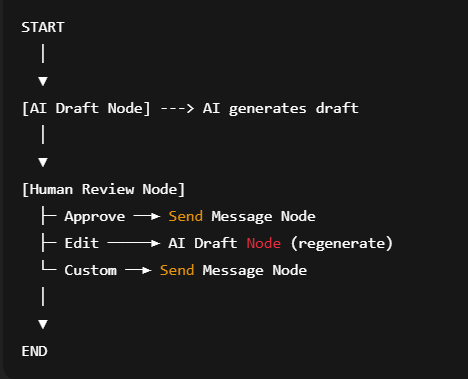


## ✅ Key Points

- AI never sends anything automatically without human approval.
- Human feedback can change AI output before sending.
- Memory allows AI to remember previous messages and feedback.
- Workflow can loop until human is satisfied.

In [ ]:
from dotenv import load_dotenv
load_dotenv()
import os
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

# Setup
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
llm = ChatGroq(model="llama-3.1-8b-instant")

# State definition
class MessageState(TypedDict):
    user_request: str
    ai_draft: str
    final_message: str
    status: Literal["draft", "review", "approved", "sent"]

# Nodes
def generate_draft(state: MessageState):
    """AI message draft generate karega"""
    prompt = f"Write a friendly message: {state['user_request']}. Keep it short and casual."
    ai_response = llm.invoke([HumanMessage(content=prompt)])
    
    print(f"\n🤖 AI Draft: {ai_response.content}")
    return {"ai_draft": ai_response.content, "status": "review"}

def human_review(state: MessageState):
    """Human review karega"""
    print(f"\n📝 Review Options:")
    print("1. ✅ Approve and send")
    print("2. ✏️ Edit message")
    print("3. 🔄 Regenerate")
    
    choice = input("Choose (1/2/3): ").strip()
    
    if choice == "1":
        final_msg = state['ai_draft']
        print(f"✅ Approved: {final_msg}")
        return {"final_message": final_msg, "status": "sent"}
    
    elif choice == "2":
        edited = input("Enter your edited message: ")
        print(f"✅ Edited and sent: {edited}")
        return {"final_message": edited, "status": "sent"}
    
    else:  # Regenerate
        print("🔄 Regenerating...")
        return {"status": "draft"}

# Graph build karo
workflow = StateGraph(MessageState)

# Nodes add karo
workflow.add_node("generate", generate_draft)
workflow.add_node("review", human_review)

# Edges set karo
workflow.add_edge(START, "generate")
workflow.add_edge("generate", "review")

def check_approval(state: MessageState):
    """Check karo human ne approve kiya ya regenerate karna hai"""
    if state["status"] == "sent":
        return END
    else:
        return "generate"

workflow.add_conditional_edges(
    "review",
    check_approval,
    {
        "generate": "generate",
        END: END
    }
)

# Compile karo
app = workflow.compile()

# Run karo
def send_message_to_friend():
    print("🧠 Friend Message Sender (Human-in-Loop)")
    print("=" * 40)
    
    user_input = input("\nWhat message do you want to send? ")
    
    initial_state = {
        "user_request": user_input,
        "ai_draft": "",
        "final_message": "", 
        "status": "draft"
    }
    
    # Graph run karo
    final_state = app.invoke(initial_state)
    
    print(f"\n🎉 Final message sent: {final_state['final_message']}")

# Run the workflow
if __name__ == "__main__":
    send_message_to_friend()

🧠 Friend Message Sender (Human-in-Loop)



What message do you want to send?  say my fiend to hi



🤖 AI Draft: "Hey, I just wanted to say hi to you on my friend's behalf! They said to give you a shout and hope you're doing well."

📝 Review Options:
1. ✅ Approve and send
2. ✏️ Edit message
3. 🔄 Regenerate


Choose (1/2/3):  1


✅ Approved: "Hey, I just wanted to say hi to you on my friend's behalf! They said to give you a shout and hope you're doing well."

🎉 Final message sent: "Hey, I just wanted to say hi to you on my friend's behalf! They said to give you a shout and hope you're doing well."


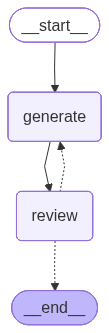

📊 Graph visualization displayed!


In [42]:
from IPython.display import Image, display

# Graph dikhao
try:
    display(Image(app.get_graph().draw_mermaid_png()))
    print("📊 Graph visualization displayed!")
except:
    print("Graph display ke liye extra packages chahiye")